In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

In [4]:
import os
import pandas as pd
from tqdm import tqdm

import os
import pandas as pd
from tqdm import tqdm

# Initialize lists to store image paths and labels
images = []
labels = []

# Iterate over the directory containing all images
asl_dataset_path = '/content/drive/MyDrive/asl_dataset'
for subfolder in tqdm(os.listdir(asl_dataset_path)):
    subfolder_path = os.path.join(asl_dataset_path, subfolder)
    if not os.path.isdir(subfolder_path) or subfolder == 'asl_dataset':
        continue
    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        if os.path.isfile(image_path):  # Check if it's a file
            images.append(image_path)
            labels.append(subfolder)

# Create DataFrame
df = pd.DataFrame({'image': images, 'label': labels})
print(df)


100%|██████████| 37/37 [00:00<00:00, 92.64it/s]


                                                  image label
0     /content/drive/MyDrive/asl_dataset/9/hand1_9_b...     9
1     /content/drive/MyDrive/asl_dataset/9/hand1_9_b...     9
2     /content/drive/MyDrive/asl_dataset/9/hand1_9_b...     9
3     /content/drive/MyDrive/asl_dataset/9/hand1_9_r...     9
4     /content/drive/MyDrive/asl_dataset/9/hand1_9_l...     9
...                                                 ...   ...
2510  /content/drive/MyDrive/asl_dataset/t/hand5_t_b...     t
2511  /content/drive/MyDrive/asl_dataset/t/hand5_t_b...     t
2512  /content/drive/MyDrive/asl_dataset/t/hand5_t_d...     t
2513  /content/drive/MyDrive/asl_dataset/t/hand5_t_b...     t
2514  /content/drive/MyDrive/asl_dataset/t/hand4_t_b...     t

[2515 rows x 2 columns]


In [5]:
import os
import pandas as pd
from tqdm import tqdm

# Initialize lists to store image paths and labels
images = []
labels = []

# Iterate over the directory containing all images
asl_dataset_path = '/content/drive/MyDrive/asl_dataset'
for subfolder in tqdm(os.listdir(asl_dataset_path)):
    subfolder_path = os.path.join(asl_dataset_path, subfolder)
    if not os.path.isdir(subfolder_path) or subfolder == 'asl_dataset':
        continue
    for image_filename in tqdm(os.listdir(subfolder_path), leave=False, desc=f'Processing {subfolder}'):
        image_path = os.path.join(subfolder_path, image_filename)
        if os.path.isfile(image_path):  # Check if it's a file
            images.append(image_path)
            labels.append(subfolder)

# Create DataFrame
df = pd.DataFrame({'image': images, 'label': labels})
print(df)


Processing 9:   0%|          | 0/70 [00:00<?, ?it/s]
                                                    
Processing 0:   0%|          | 0/70 [00:00<?, ?it/s]
                                                    
Processing 8:   0%|          | 0/70 [00:00<?, ?it/s]
                                                    
Processing 4:   0%|          | 0/70 [00:00<?, ?it/s]
                                                    
Processing 6:   0%|          | 0/70 [00:00<?, ?it/s]
                                                    
Processing 3:   0%|          | 0/70 [00:00<?, ?it/s]
                                                    
Processing 2:   0%|          | 0/70 [00:00<?, ?it/s]
                                                    
Processing 1:   0%|          | 0/70 [00:00<?, ?it/s]
                                                    
Processing f:   0%|          | 0/70 [00:00<?, ?it/s]
                                                    
Processing i:   0%|          | 0/70 [00:00<?, 

                                                  image label
0     /content/drive/MyDrive/asl_dataset/9/hand1_9_b...     9
1     /content/drive/MyDrive/asl_dataset/9/hand1_9_b...     9
2     /content/drive/MyDrive/asl_dataset/9/hand1_9_b...     9
3     /content/drive/MyDrive/asl_dataset/9/hand1_9_r...     9
4     /content/drive/MyDrive/asl_dataset/9/hand1_9_l...     9
...                                                 ...   ...
2510  /content/drive/MyDrive/asl_dataset/t/hand5_t_b...     t
2511  /content/drive/MyDrive/asl_dataset/t/hand5_t_b...     t
2512  /content/drive/MyDrive/asl_dataset/t/hand5_t_d...     t
2513  /content/drive/MyDrive/asl_dataset/t/hand5_t_b...     t
2514  /content/drive/MyDrive/asl_dataset/t/hand4_t_b...     t

[2515 rows x 2 columns]


<ipython-input-7-9ef152c756d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set2')


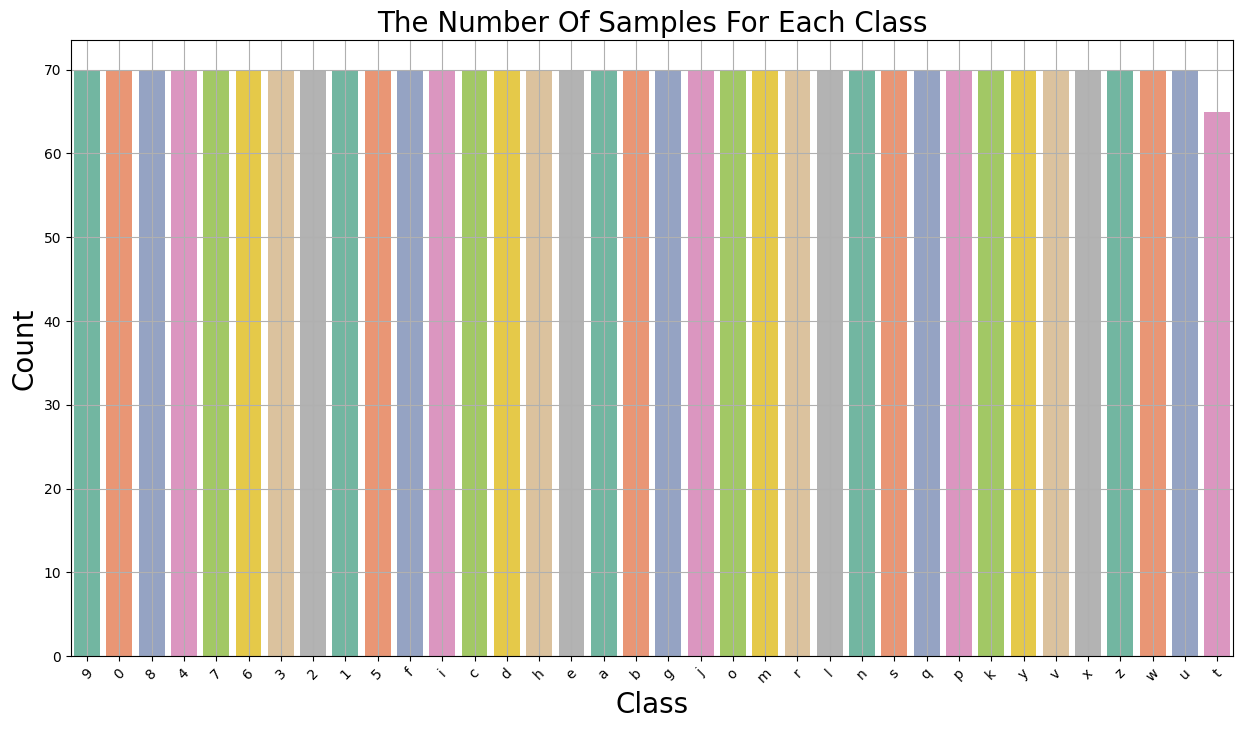

In [7]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set2')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

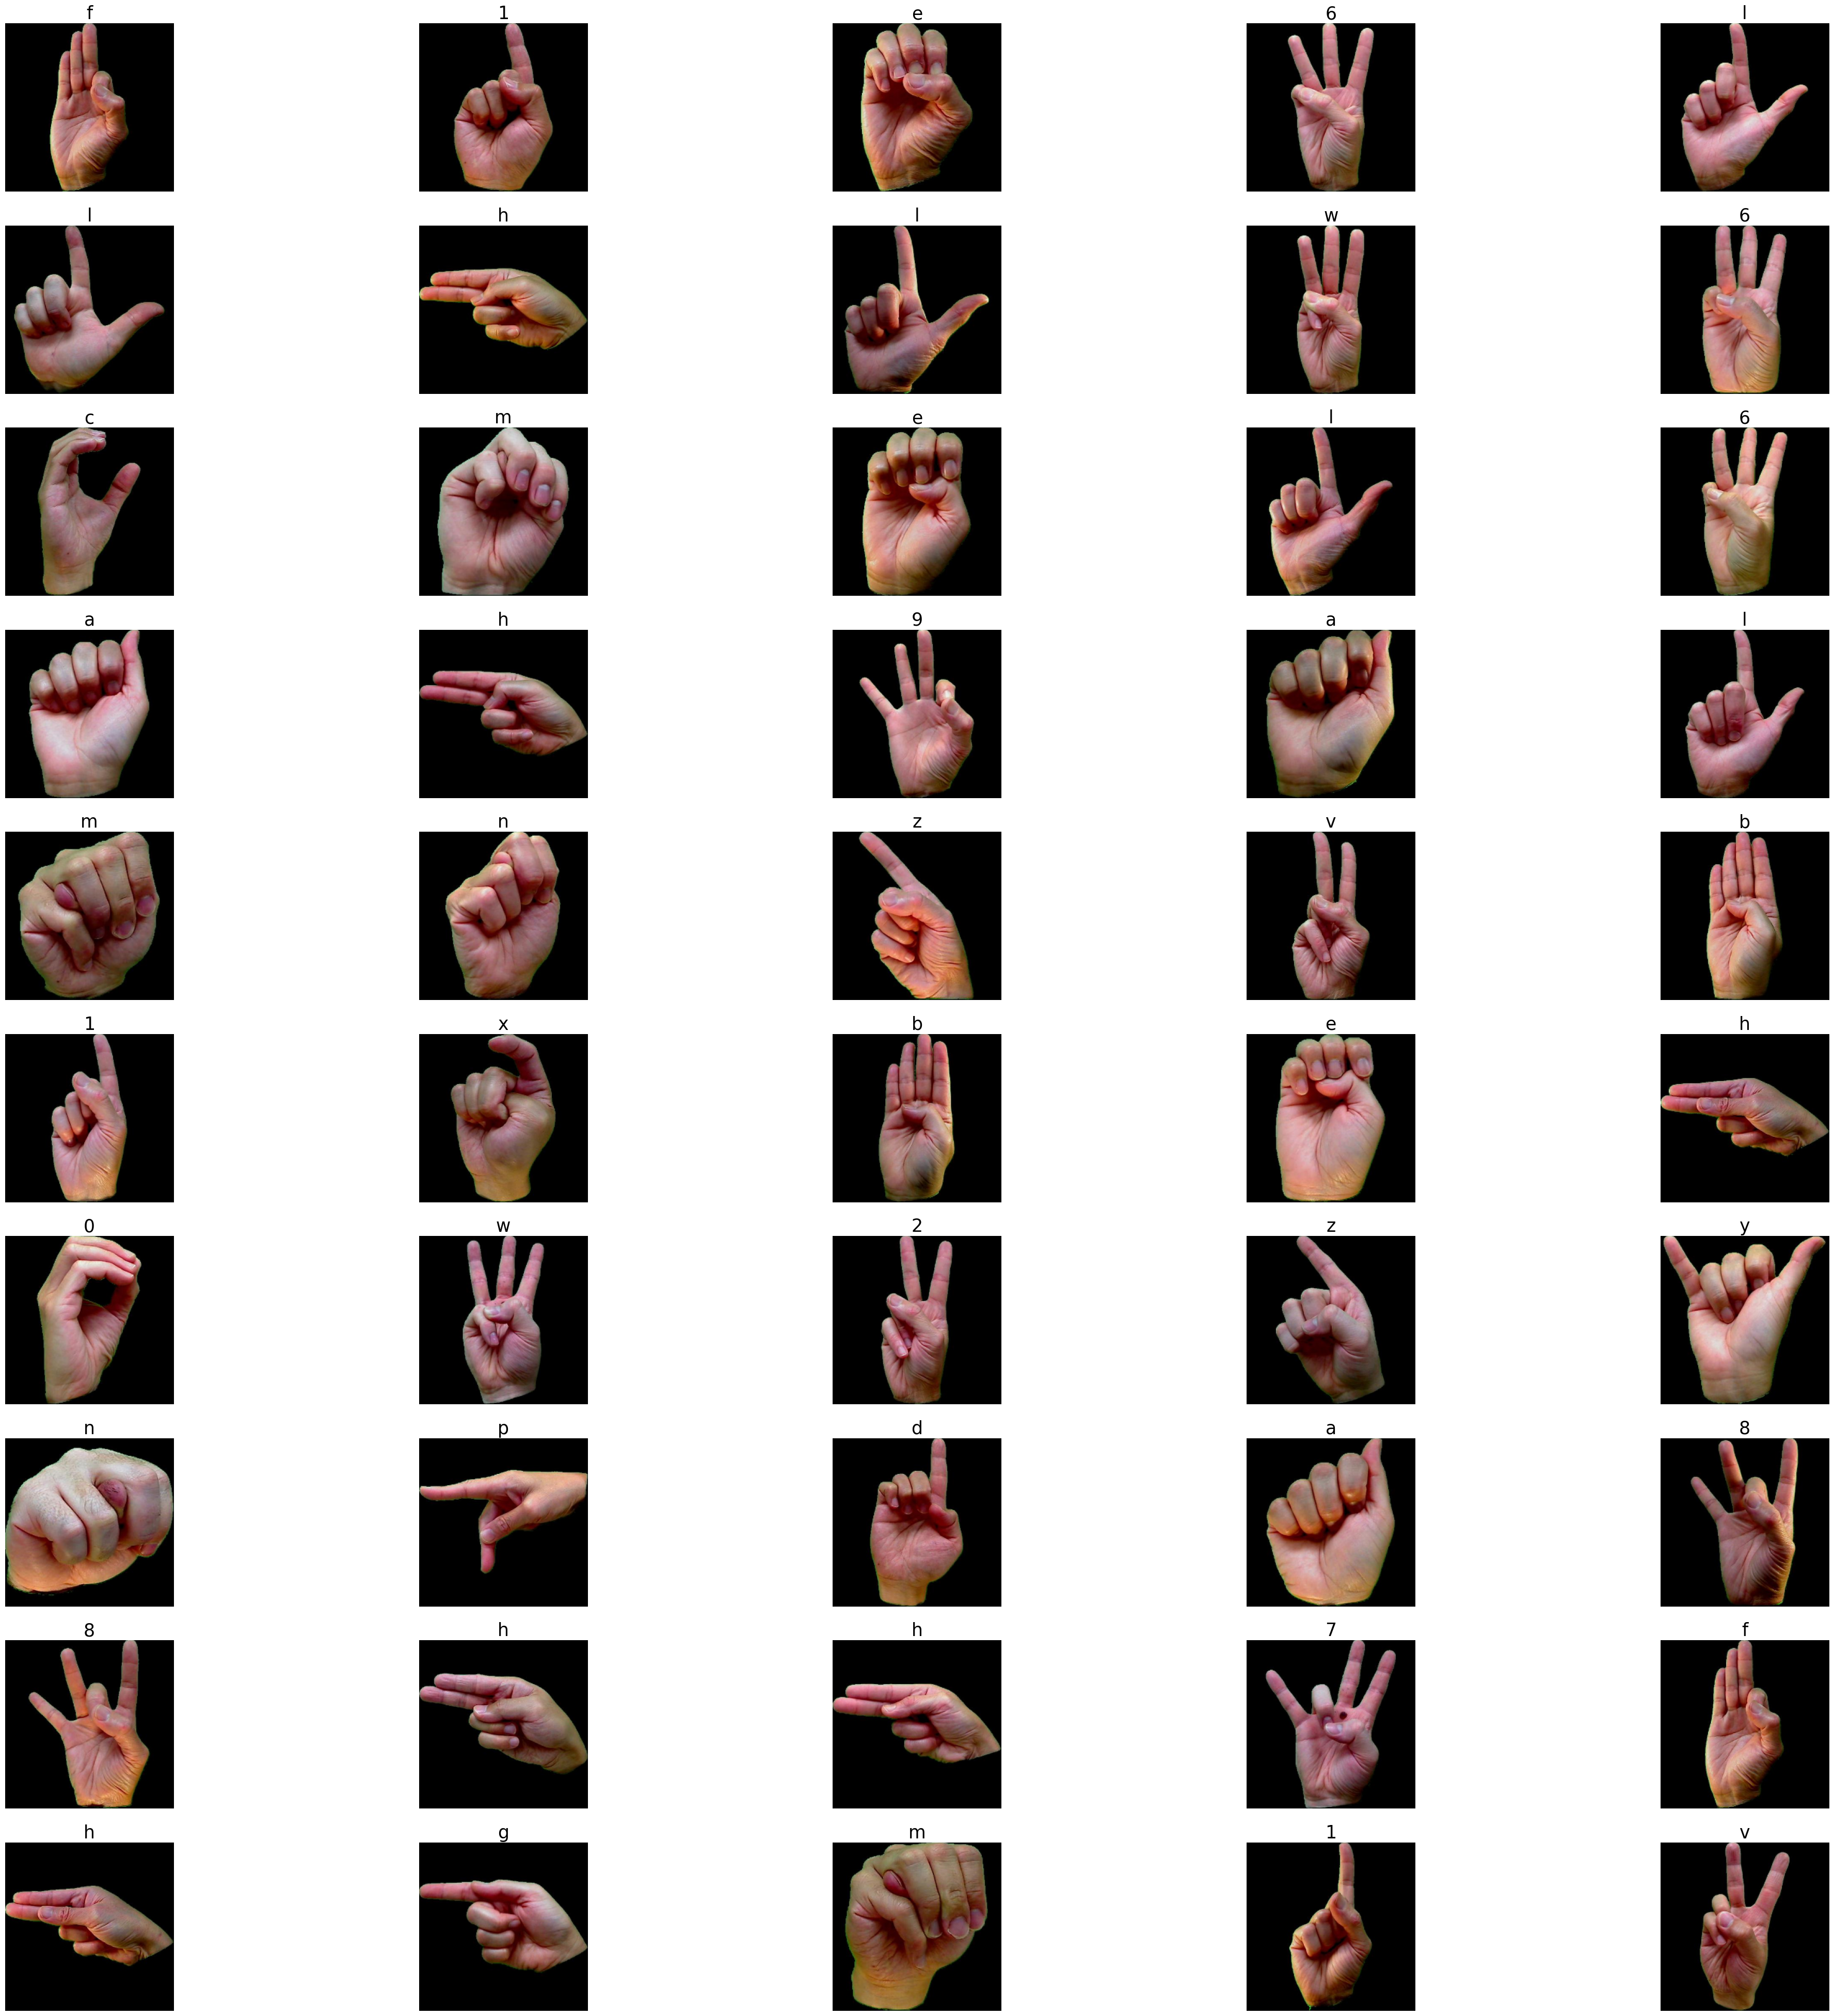

In [8]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)



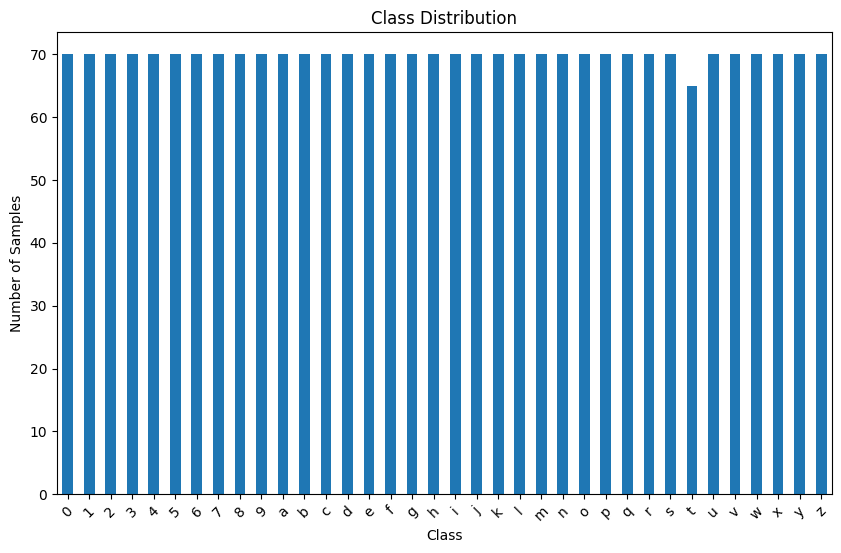

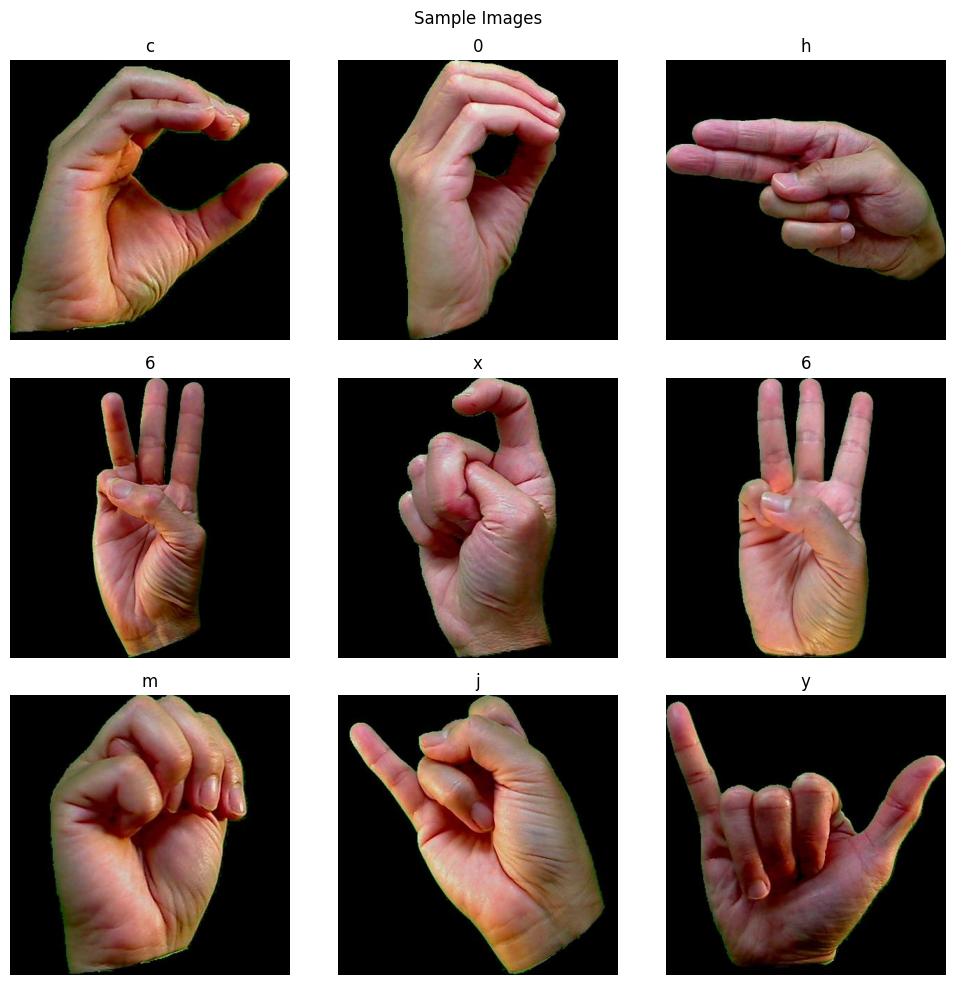

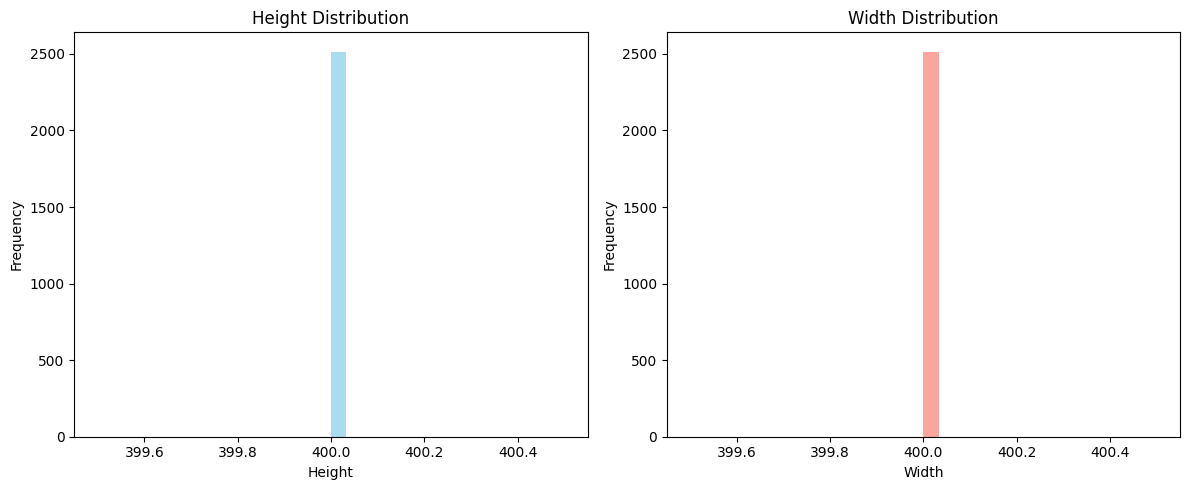

In [11]:
import matplotlib.pyplot as plt
import random

# Class Distribution Bar Plot
plt.figure(figsize=(10, 6))
df['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

# Sample Images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    idx = random.randint(0, len(df) - 1)
    img_path = df.iloc[idx]['image']
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(df.iloc[idx]['label'])
    plt.axis('off')
plt.suptitle('Sample Images')
plt.tight_layout()
plt.show()

# Histogram of Image Sizes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['image'].apply(lambda x: plt.imread(x).shape[0]), bins=30, color='skyblue', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['image'].apply(lambda x: plt.imread(x).shape[1]), bins=30, color='salmon', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [9]:
X_train, X_test1, y_train, y_test1 = train_test_split(df['image'], df['label'], test_size=0.3, random_state=42,shuffle=True,stratify=df['label'])
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

In [10]:
image_size = (224,224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
val_generator = datagen.flow_from_dataframe(
    df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 1760 validated image filenames belonging to 36 classes.
Found 378 validated image filenames belonging to 36 classes.
Found 377 validated image filenames belonging to 36 classes.
